<a href="https://colab.research.google.com/github/AliyevaO/sales_predictions/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Sales predictions Project
* Oleksandra Aliyeva 
* 06.04.2022




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Bootcamp/01 Week_ Python/sales_predictions.csv'

In [4]:
#checking a head of a DataFrame
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#checking how many rows and columns are in a DataFrame
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_predictions.shape

(8523, 12)

##Cleaning Data

In [7]:
#checking for duplicates
sales_predictions.duplicated().sum()

0

In [8]:
#checking for missing values and columns in which we have it
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#filling missing rows in Column 'Outlet_Size' with 'Missing', best way in my opinion to do it without loosing data.
outlet_size_missing = sales_predictions['Outlet_Size'].fillna('Missing')

In [10]:
sales_predictions['Outlet_Size'].fillna(value=outlet_size_missing, inplace=True)

In [11]:
#filling missing rows in Column 'Item_Weight' with average value of the Column.
mean_value = sales_predictions['Item_Weight'].mean()

In [12]:
sales_predictions['Item_Weight'].fillna(value=mean_value, inplace=True)

In [13]:
#checking if there is any missing data left
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#checking the types of data
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
#looping through data types to get only ones with object type
data_types = sales_predictions.dtypes
obj_cols = data_types[ data_types=='object'].index
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
#looking for inconsistent categories
for col in obj_cols:
    print(f'- {col}:')
    print(sales_predictions[col].value_counts(dropna=False))
    print("\n************")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

************
- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

************
- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

************
- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045

First way of renaming inconsistent categories



In [17]:
#renaming inconsistent categories
repl_map ={'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(repl_map)
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Second way of renaming inconsistent categories

In [18]:
#renaming inconsistent categories
#sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['low fat'],'Low Fat')

In [19]:
#sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['LF'],'Low Fat')

In [20]:
#sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['reg'],'Regular')

In [21]:
#sales_predictions['Item_Fat_Content'].unique()

## Starting to analyze our Data

In [22]:
#obtaining the summary statistics of each numerical columns 
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
#checking for correlation in data
corr = sales_predictions.corr()

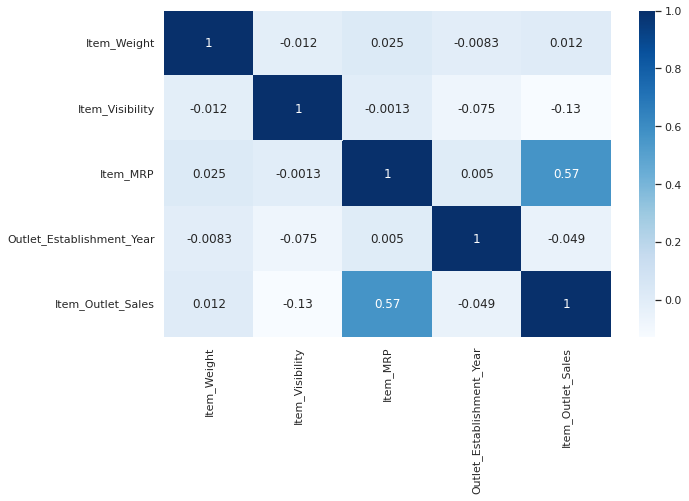

In [24]:
#using heatmap to see a correlation between features
sns.set(rc={"figure.figsize":(10, 6)})
sns.heatmap(corr, cmap = 'Blues', annot = True);

In heatmap we did not identify relationships between variables in our dataset. Exept two columns that have a moderate correlations, they are Maximum Retail Price of the product (Item_MRP) and Sales of the product in the particular store(Item_Outlet_Sales). 

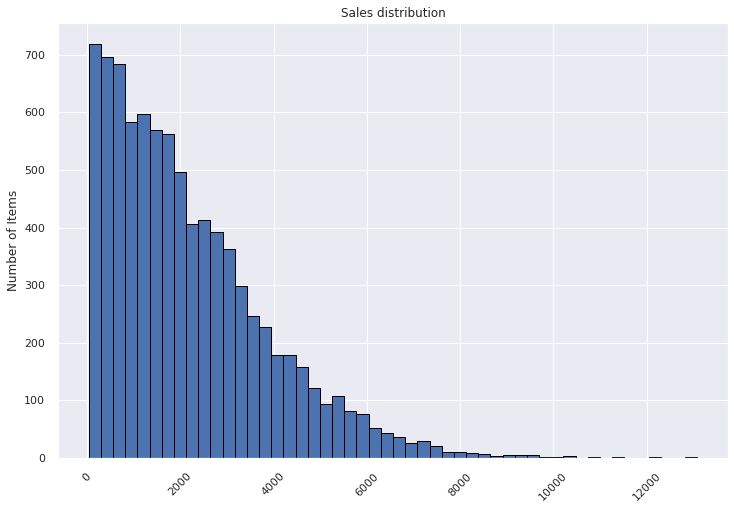

In [25]:
#plotting sales of the product in the particular store
plt.style.use('seaborn')
sns.set(rc={"figure.figsize":(12, 8)})
sales_predictions['Item_Outlet_Sales'].hist(bins = 50, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Number of Items')
plt.title('Sales distribution');

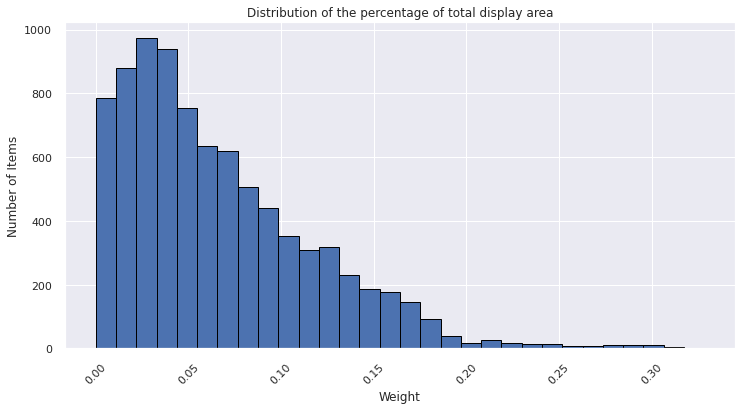

In [35]:
#plotting the percentage of total display area of all products
sales_predictions['Item_Visibility'].hist(bins = 30, edgecolor='black', figsize=(12,6))
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Weight')
plt.ylabel('Number of Items')
plt.title('Distribution of the percentage of total display area');

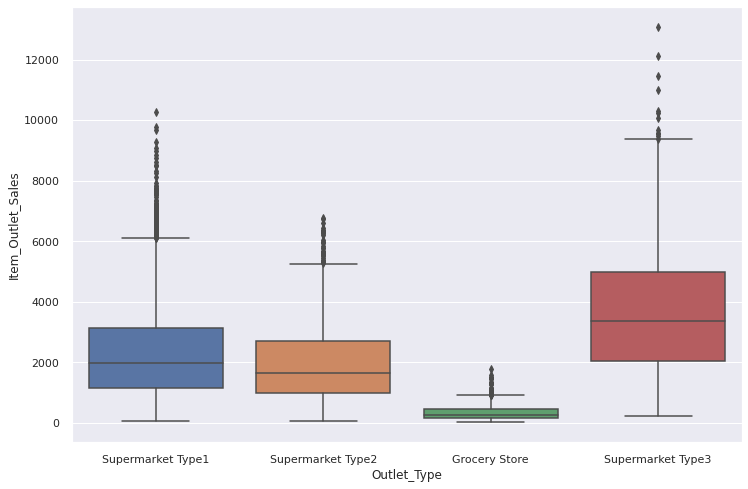

In [29]:
#creating a boxplot to see the difference in item sales depending on outlet type
sns.set(rc={"figure.figsize":(12, 8)})
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = sales_predictions);

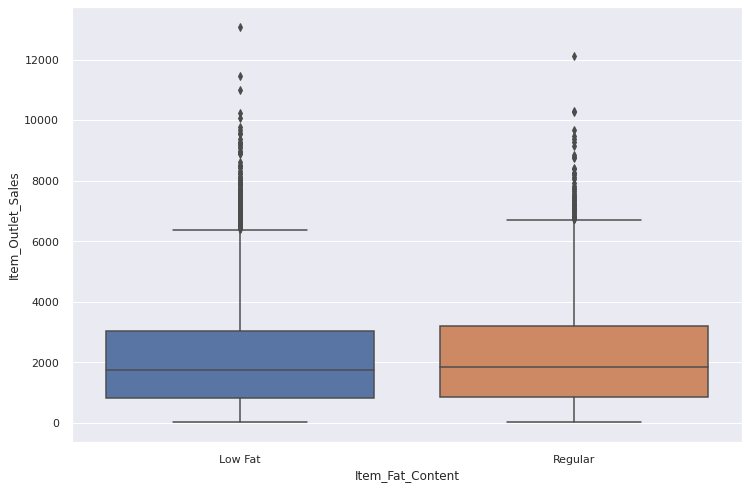

In [31]:
#creating a boxplot to see the difference in item sales depending on whether the product is low fat or regular
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = sales_predictions);

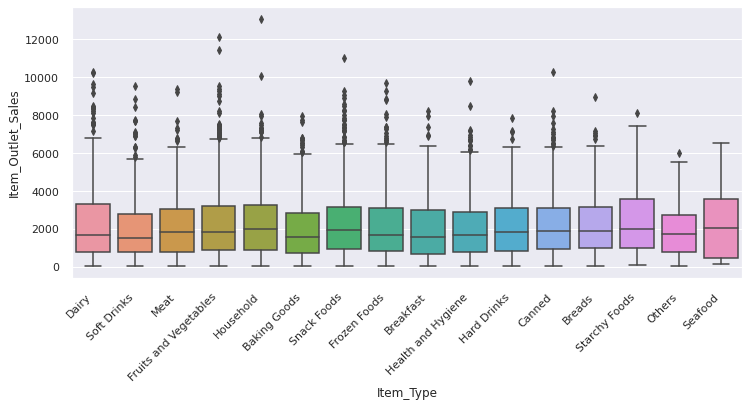

In [32]:
#creating a boxplot to see the difference in item sales depending on the category to which the product belongs
sns.set(rc={"figure.figsize":(12, 5)})
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = sales_predictions,)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');